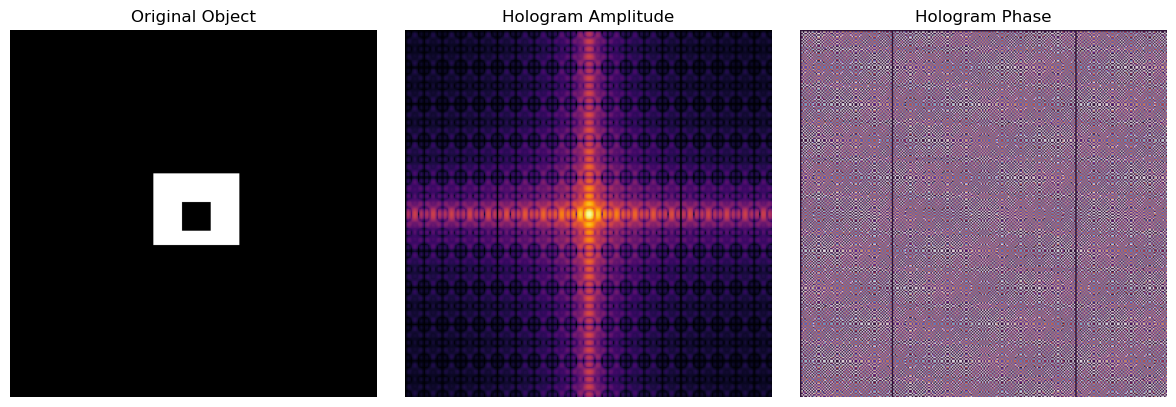

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

os.makedirs("outputs", exist_ok=True)

# Load object
N = 256
obj = np.zeros((N, N))
obj[100:150, 100:160] = 1.0   # rectangle object
obj[120:140, 120:140] = 0.0   # "hidden" hole

# FFT hologram
F = np.fft.fftshift(np.fft.fft2(obj))
amp = np.abs(F)
phase = np.angle(F)

# Save panels
fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].imshow(obj, cmap='gray')
axs[0].set_title("Original Object")

axs[1].imshow(np.log1p(amp), cmap='inferno')
axs[1].set_title("Hologram Amplitude")

axs[2].imshow(phase, cmap='twilight')
axs[2].set_title("Hologram Phase")

for ax in axs: ax.axis("off")

plt.tight_layout()
plt.savefig("outputs/hologram_camouflage_panels.png", dpi=150)
plt.show()

# Save phase-only hologram
plt.imsave("outputs/hologram_phase.png", phase, cmap='twilight')